## Análise de sentimentos sobre linhas aéreas (Parte 4/4)

Este notebook faz parte de um conjunto de notebooks com o objetivo de realizar a tarefa de análise de sentimentos em tweets sobre linhas aéreas americanas. 

Neste quarto notebook, iremos realizar uma análise da classificação realizada pelos modelos treinados e aplicados aos tweets coletados. Os tweets foram coletados no perído de 07/06/2018 até 07/08/2018. Foram coletados tweets que contivessem menções aos seguintes perfis: [@AmericanAir](https://twitter.com/AmericanAir), [@Delta](https://twitter.com/Delta), [@SouthwestAir](https://twitter.com/SouthwestAir) e [@British_Airways](https://twitter.com/British_Airways).

### EDA da classificação
Agora vamos visualizar como o algoritmo classificou as instancias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# plt.style.use('ggplot')
sns.set(style="white", color_codes=True)

In [2]:
from os import listdir
from os.path import isfile, join

tweetsPath = '04_output/'
folders = [f for f in listdir(tweetsPath)]

files = dict()
for folder in folders:
    files[folder] = list()
    for file in listdir(join(tweetsPath,folder)):
        files[folder].append(join(tweetsPath,folder,file))


In [3]:
predictions = dict()

# Cada classificador tera uma lista contendo os diretorios dos tweets para predicao
for key in files.keys():
    predictions[key] = list()
    for path in files[key]:    
        tweetsDF = pd.read_csv(path)
        predictions[key].append(tweetsDF.drop(labels=["Unnamed: 0"], axis=1))

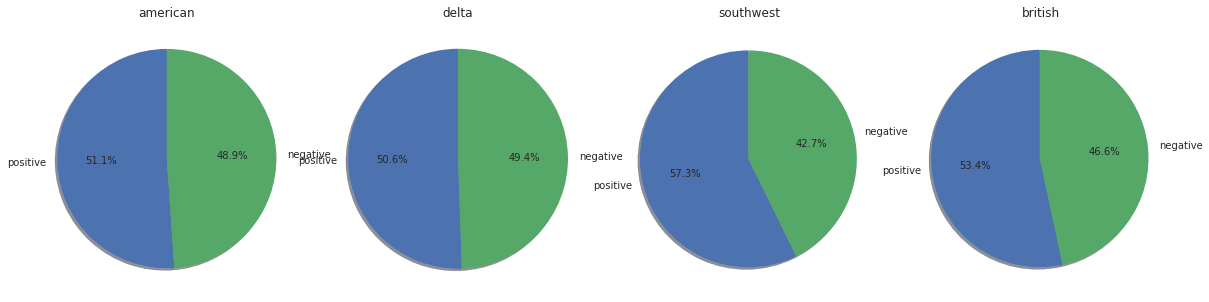

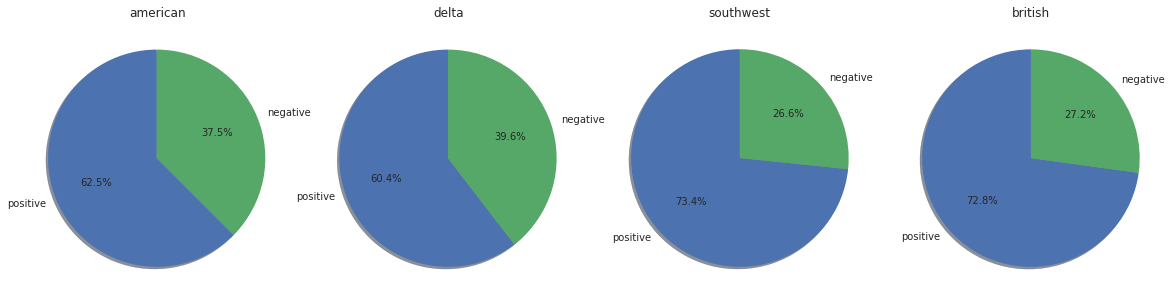

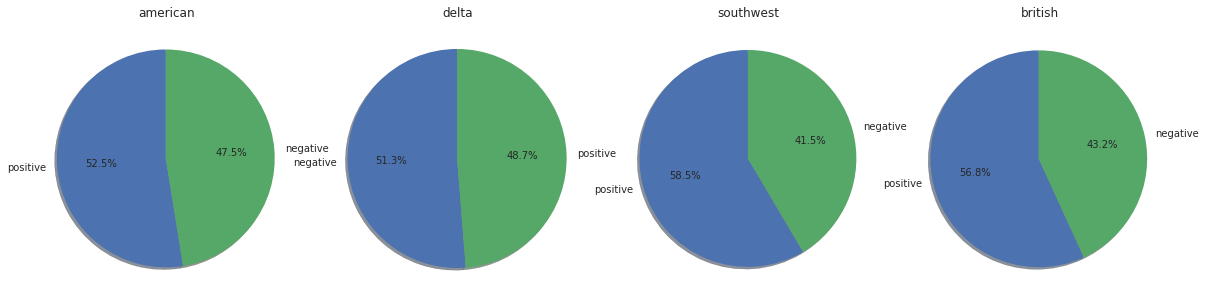

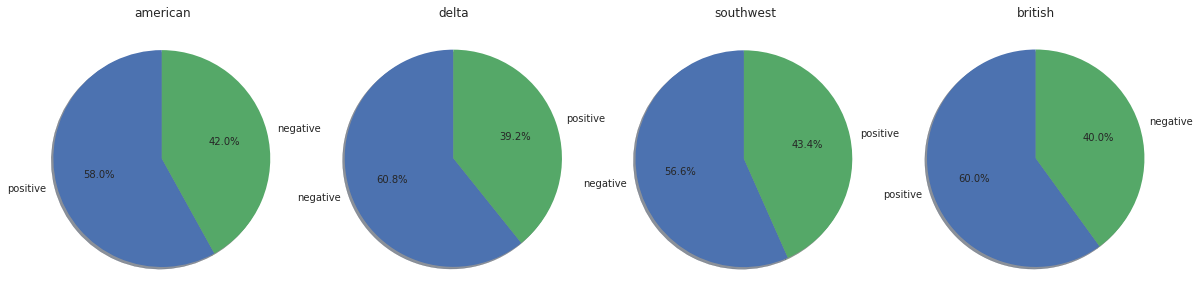

In [4]:
def plotClassDistribution(dfList, pieTitle, chartTitle):
    fig1, ax1 = plt.subplots(1, len(dfList), figsize=(20,5))
    # labels = ['negative', 'positive']
    # explode = (0.1, 0)

    for i in range(len(dfList)):
        
        dfList[i]['sentimentName'] = dfList[i]['sentiment'].apply(lambda x: 'negative' if x==0 else 'positive')
        sentimentCounter = dfList[i]['sentimentName'].value_counts()

        labels = dfList[i]['sentimentName'].unique()
        _ = ax1[i].pie(sentimentCounter, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        _ = ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        _ = ax1[i].set(title = pieTitle[i].split('/')[2].split("_")[0])
#         _ = ax1[i].annotate(labels, sentimentCounter)
    plt.savefig(classifier+'_classification')
    _ = plt.show()

for classifier in predictions.keys():
    plotClassDistribution(predictions[classifier], files[classifier], classifier)

In [6]:
# fig1, ax1 = plt.subplots(1, len(dfList), figsize=(20,5))
# # labels = ['negative', 'positive']
# # explode = (0.1, 0)

# for i in range(len(dfList)):
#     dfList[i]['sentimentName'] = dfList[i]['sentiment'].apply(lambda x: 'negative' if x==0 else 'positive')
#     sentimentCounter = dfList[i]['sentimentName'].value_counts()

#     labels = dfList[i]['sentimentName'].unique()
#     _ = ax1[i].pie(sentimentCounter, labels=labels, autopct='%1.1f%%',
#             shadow=True, startangle=90)
#     _ = ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     _ = ax1[i].set(title = onlyfiles[i].split("_")[0])

# _ = plt.show()

In [7]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
i = "SVC"
df =  predictions[i][ predictions[i]["sentimentName"]=='negative']
words = ' '.join(df["correctedText"])
cleanedWord = " ".join([w for w in words.split()
                            if "http" not in w
                            and not w.startswith("@")
                            and w != "RT"
                       ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleanedWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()